In [12]:
#impoting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression


In [13]:
# Importing the dataset
try:
    dataset = pd.read_csv('test.csv')
    print(dataset.head())
except:
    print("File not found")


   age  sex  Weight  HR  heartAttackRisk
0   50    1    80.0  72         57.09856
1   42    0    65.0  85         49.25872
2   55    1    90.0  65         61.65826
3   38    0    72.0  90         51.90988
4   63    1    78.0  75         57.68374


In [14]:
#train test split
X = dataset[['age', 'sex','Weight','HR']]
y = dataset[['heartAttackRisk']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)


In [20]:
#linear dission tree
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(y_pred)
print(y_test)


[53.4922  64.11328 64.53538 46.04314 64.68286 49.56082 60.66826 67.5538
 67.71028 55.25632 64.2907  50.47282 60.38398 43.71298 56.86636 51.2278
 61.79992 58.75006 59.20306 58.5727  60.62146 46.51192 59.60524 50.10292
 65.18716 57.36808 54.0307  54.0307  58.74574 58.80544 55.52902 55.13086
 56.35822 60.9679  62.5387  64.06414 63.84388 58.9303  56.96254 49.56082
 65.31304 58.5727  60.9679  54.63592 54.0307  59.1871  55.74898 53.57188
 53.47174 59.60524 55.78582 59.96368 58.83148 66.79762 57.34072 62.68948
 57.49672 64.42342 65.31304 62.37796 59.57722 56.8924  54.14656 55.68946
 61.66774 64.2412  63.51616 63.22576 67.7374  52.57576 64.70458 52.68916
 60.92062 58.16284 65.2993  61.14244 54.63592 64.82818 65.4292  54.78274
 64.41964 59.97178 57.43258 60.40864 56.4628  58.98892 52.52518 62.54026
 60.52588 70.1077  64.41964 54.78274 56.16994 63.7882  59.5144  69.54664
 57.61936 51.0964  66.62056 54.11956 58.5727  59.20306 60.5833  55.68736
 48.42544 53.47174 52.53232 58.74574 55.49746 67.1565

In [22]:
#accuracy
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))


0.9871650829870255


In [21]:
predict = regressor.predict([[50,1,70,80]])
print(predict)


[52.96942]


/home/xer0bit/.local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [25]:
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable


In [32]:
#exporting model in tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

#normalization
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X_train))

#model
model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 4)                9         
 ion)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 14
Trainable params: 5
Non-trainable params: 9
_________________________________________________________________


In [33]:
#compile
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


In [36]:
#fit
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    verbose=0, epochs=100)


IndentationError: unexpected indent (2752083987.py, line 6)

In [29]:
#plot
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.028954,0.020899,95
96,0.021660,0.031789,96
97,0.031605,0.044288,97
98,0.025508,0.013389,98
99,0.024400,0.033135,99


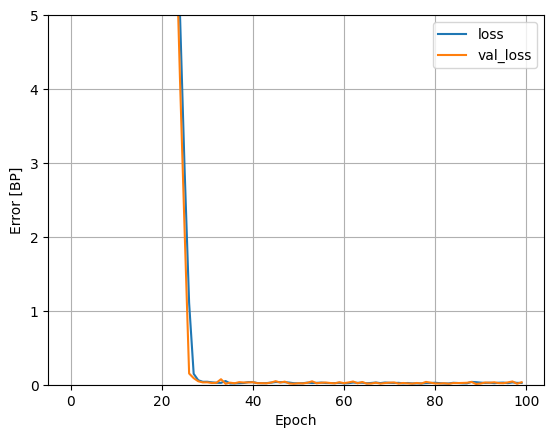

In [30]:
#plot
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 5])
    plt.xlabel('Epoch')
    plt.ylabel('Error [BP]')
    plt.legend()
    plt.grid(True)

plot_loss(history)

In [37]:
#predict
predict = model.predict(X_test)
print(predict)

14/14 [==============================] - 0s 2ms/step
[[53.63669 ]
 [63.686203]
 [64.92149 ]
 [45.79634 ]
 [65.22583 ]
 [49.77171 ]
 [60.5122  ]
 [68.57069 ]
 [67.64143 ]
 [55.47266 ]
 [64.001656]
 [50.588905]
 [60.61305 ]
 [45.906857]
 [56.274445]
 [51.36518 ]
 [61.62554 ]
 [58.81935 ]
 [58.685493]
 [57.403854]
 [60.225758]
 [47.520767]
 [58.69156 ]
 [50.493107]
 [65.62175 ]
 [57.296505]
 [54.812325]
 [54.091682]
 [58.927338]
 [58.17576 ]
 [55.456493]
 [55.092205]
 [56.218136]
 [62.276134]
 [63.152584]
 [65.14514 ]
 [64.75024 ]
 [58.332676]
 [57.191   ]
 [50.246513]
 [64.66951 ]
 [58.859573]
 [62.377163]
 [55.577805]
 [54.091682]
 [58.25545 ]
 [55.369324]
 [53.798798]
 [53.648495]
 [59.217678]
 [55.816944]
 [59.021328]
 [58.65857 ]
 [66.29352 ]
 [56.953472]
 [61.57164 ]
 [57.102818]
 [63.63624 ]
 [65.41635 ]
 [61.603172]
 [59.883442]
 [56.56765 ]
 [53.711987]
 [54.805843]
 [61.355923]
 [64.96247 ]
 [62.842102]
 [62.72769 ]
 [66.65492 ]
 [52.39231 ]
 [65.03713 ]
 [52.284306]
 [61.4385  

In [38]:
#accuracy
from sklearn.metrics import r2_score
print(r2_score(y_test, predict))

#input



0.9999356338304536


In [41]:
input = np.array([[50,1,70,80]])
print(input)

#predict
predict = model.predict(input)
print(predict)


[[50  1 70 80]]
1/1 [==============================] - 0s 50ms/step
[[53.057396]]


In [45]:
#dump the model in json file
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")


Saved model to disk
